# Imports
Import libraries and write settings here

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50


# Matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# Scikit-learn utilities
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import SCORERS, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split,  GridSearchCV, RepeatedStratifiedKFold, cross_val_score


# Standard machine learning models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [3]:
def regressor_metrics(model, X_train, X_test, y_train, y_test):
    
    
    # Record score from cross cross-validation run
    cv_results = cross_val_score(model, X_train, y_train, cv=15, scoring='r2')
   
    print("Cross validation results: R square = %s" % ["{0:.3f}".format(i) for i in cv_results])
    
    print("Mean of Cross validation results: R square = %s" % "{0:.3f}".format(cv_results.mean()))
    
    
    # Fit the model:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Print RMSE on train/test data set:
    print("\n")
    #print("R square on training data set: %s\n" % "{0:.3f}".format(r2_score(y_train, y_train_pred)))
    print("R square on testing data set: %s\n" % "{0:.3f}".format(r2_score(y_test, y_test_pred)))
    
    print("\n")
    print("RMSE on training data set: %s\n" % "{0:.3f}".format(mean_squared_error(y_train, y_train_pred, squared = False)))
    print("RMSE on testing data set: %s\n" % "{0:.3f}".format(mean_squared_error(y_test, y_test_pred, squared = False)))
    
    
    

# Dataset

## Load data 

In [4]:
# Load data and print the first 5 lines
df_raw = pd.read_csv('KidWai_cleaned_data_022022.csv')

In [5]:
df_raw.shape

(2471, 14)

In [6]:
df_raw.head()

,uid,treatment,daysTotal,GeneAllele,Nbr_FU_Visits,gender,race,hiv,diabetes,cvd,anyca,Nbr_of_TotalMeds,Nbr_of_Conditions,pae
0,1,EFAVIRENZ,30,1,7,Male,2.0,1,0,0,0,11,1,1
1,2,TRAMADOL,60,1,25,Male,3.0,1,0,0,0,23,1,1
2,3,OMEPRAZOLE,30,1,7,Male,1.0,1,0,0,0,4,1,1
3,4,IBUPROFEN,30,1,14,Male,4.0,1,0,0,0,1,1,1
4,5,IBUPROFEN,60,1,14,Male,2.0,1,1,0,0,2,2,1


## Extract VOIs for RQ2

In [7]:
voi_list = ["Nbr_FU_Visits"
            , "GeneAllele"
            , "daysTotal"
            , "hiv"
            , "diabetes"
            , "cvd"
            , "anyca"
            , "Nbr_of_Conditions"]

In [8]:
df1 = df_raw.loc[:, voi_list]

In [9]:
df1.head()

,Nbr_FU_Visits,GeneAllele,daysTotal,hiv,diabetes,cvd,anyca,Nbr_of_Conditions
0,7,1,30,1,0,0,0,1
1,25,1,60,1,0,0,0,1
2,7,1,30,1,0,0,0,1
3,14,1,30,1,0,0,0,1
4,14,1,60,1,1,0,0,2


In [10]:
df1.describe()

,Nbr_FU_Visits,GeneAllele,daysTotal,hiv,diabetes,cvd,anyca,Nbr_of_Conditions
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,27.715500,0.789154,70.579927,0.655200,0.242007,0.257386,0.261433,1.416026
std,48.692404,0.407992,151.442334,0.475399,0.428385,0.437282,0.439504,1.086600
min,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,15.000000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,29.000000,1.000000,60.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,861.000000,1.000000,3517.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Nbr_FU_Visits      2471 non-null   int64
 1   GeneAllele         2471 non-null   int64
 2   daysTotal          2471 non-null   int64
 3   hiv                2471 non-null   int64
 4   diabetes           2471 non-null   int64
 5   cvd                2471 non-null   int64
 6   anyca              2471 non-null   int64
 7   Nbr_of_Conditions  2471 non-null   int64
dtypes: int64(8)
memory usage: 154.6 KB


<font color='#7dff1d'> Notes:</font>
    
* There are no missing values in this data set.

## Feature scaling

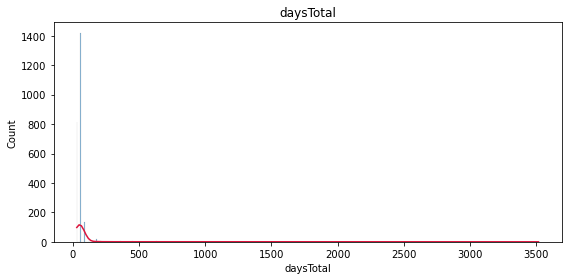

In [12]:
fig1, ax = plt.subplots(1, 1, figsize=(8,4))
sns.histplot(x='daysTotal'
             , data = df1
             , ax=ax
             , kde = True)
ax.lines[0].set_color('crimson')
ax.set_title('daysTotal')
plt.tight_layout()

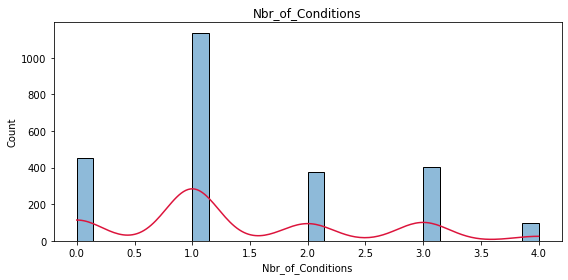

In [13]:
fig2, ax = plt.subplots(1, 1, figsize=(8,4))
sns.histplot(x='Nbr_of_Conditions'
             , data = df1
             , ax=ax
             , kde = True)
ax.lines[0].set_color('crimson')
ax.set_title('Nbr_of_Conditions')
plt.tight_layout()

<font color='#7dff1d'> **Variable `daysTotal` and `Nbr_of_Conditions` are not normally distributed, so `Min-Max Scaler` will be utilized to scale these two variables.**</font>
    


In [14]:
df2 = df1.copy()

In [15]:
scaler = MinMaxScaler()
df2['daysTotal_scaled'] = scaler.fit_transform(df2[['daysTotal']])
df2['Nbr_of_Conditions_scaled'] = scaler.fit_transform(df2[['Nbr_of_Conditions']])

In [16]:
df2.daysTotal.describe()

count    2471.000000
mean       70.579927
std       151.442334
min        30.000000
25%        30.000000
50%        60.000000
75%        60.000000
max      3517.000000
Name: daysTotal, dtype: float64

In [17]:
df2.daysTotal_scaled.describe()

count    2471.000000
mean        0.011637
std         0.043431
min         0.000000
25%         0.000000
50%         0.008603
75%         0.008603
max         1.000000
Name: daysTotal_scaled, dtype: float64

In [18]:
df2.Nbr_of_Conditions.describe()

count    2471.000000
mean        1.416026
std         1.086600
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Nbr_of_Conditions, dtype: float64

In [19]:
df2.Nbr_of_Conditions_scaled.describe()

count    2471.000000
mean        0.354006
std         0.271650
min         0.000000
25%         0.250000
50%         0.250000
75%         0.500000
max         1.000000
Name: Nbr_of_Conditions_scaled, dtype: float64

In [20]:
df2.drop(columns=['daysTotal', 'Nbr_of_Conditions'], axis=1, inplace=True)

In [21]:
df2.describe()

,Nbr_FU_Visits,GeneAllele,hiv,diabetes,cvd,anyca,daysTotal_scaled,Nbr_of_Conditions_scaled
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,27.715500,0.789154,0.655200,0.242007,0.257386,0.261433,0.011637,0.354006
std,48.692404,0.407992,0.475399,0.428385,0.437282,0.439504,0.043431,0.271650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
50%,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.008603,0.250000
75%,29.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.008603,0.500000
max,861.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split training and Testing sets

- Training set: 70%
- Testing set: 30%

In [22]:
X = df2.drop(columns = ["Nbr_FU_Visits"])
y = df2["Nbr_FU_Visits"]

In [23]:
X.shape

(2471, 7)

In [24]:
X.head()

,GeneAllele,hiv,diabetes,cvd,anyca,daysTotal_scaled,Nbr_of_Conditions_scaled
0,1,1,0,0,0,0.000000,0.25
1,1,1,0,0,0,0.008603,0.25
2,1,1,0,0,0,0.000000,0.25
3,1,1,0,0,0,0.000000,0.25
4,1,1,1,0,0,0.008603,0.50


In [25]:
y.shape

(2471,)

In [26]:
y.head()

0     7
1    25
2     7
3    14
4    14
Name: Nbr_FU_Visits, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [28]:
X_train.shape, X_test.shape

((1729, 7), (742, 7))

In [29]:
y_train.shape, y_test.shape

((1729,), (742,))

In [30]:
y_train.describe()

count    1729.000000
mean       28.063042
std        51.518033
min         0.000000
25%         9.000000
50%        15.000000
75%        29.000000
max       861.000000
Name: Nbr_FU_Visits, dtype: float64

In [31]:
y_test.describe()

count    742.000000
mean      26.905660
std       41.387106
min        0.000000
25%        9.000000
50%       15.000000
75%       29.000000
max      537.000000
Name: Nbr_FU_Visits, dtype: float64

In [32]:
df_train = X_train.copy()
df_test = X_test.copy()

In [33]:
df_train["Nbr_FU_Visits"] = y_train.values
df_test["Nbr_FU_Visits"] = y_test.values

In [34]:
df_train.shape

(1729, 8)

In [35]:
df_test.shape

(742, 8)

In [36]:
df_train.to_csv('data_RQ2_Visits_train.csv', index=False)

In [37]:
df_test.to_csv('data_RQ2_Visits_test.csv', index=False)

# Exploratory Data Analysis (EDA)

## Descriptive Analysis

### Outcome variable

Text(0.5, 1.0, 'Number of outpatient visits')

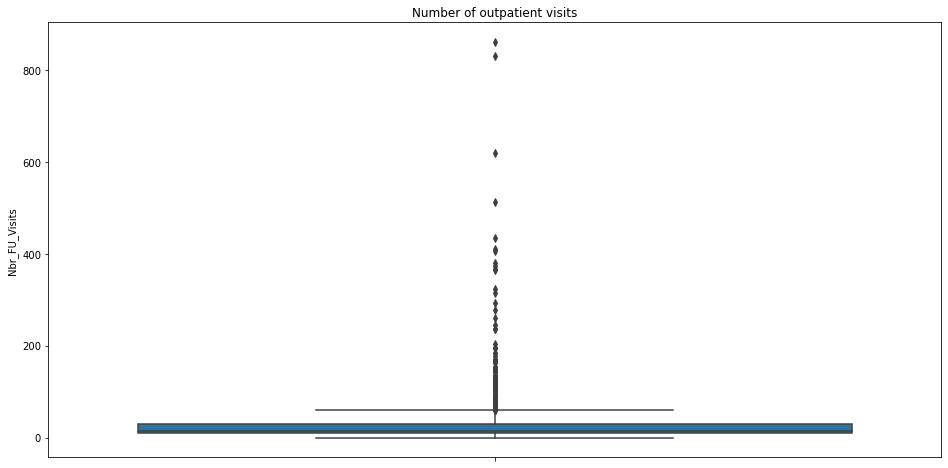

In [38]:
fig1, ax = plt.subplots(1, 1, figsize=(16,8))
sns.boxplot(y="Nbr_FU_Visits"
            , data = df_train, ax = ax)
ax.set_title("Number of outpatient visits")

Text(0.5, 1.0, 'Number of outpatient visits')

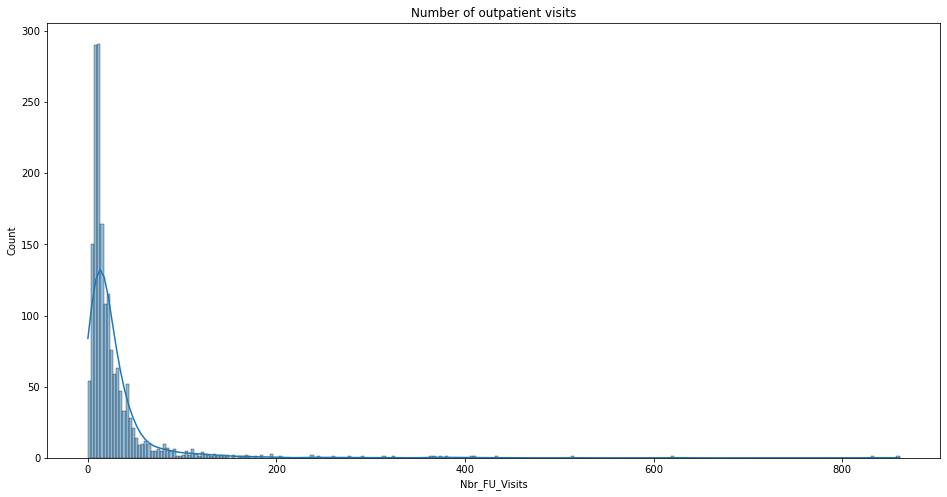

In [39]:
fig2, ax = plt.subplots(1, 1, figsize=(16,8))
sns.histplot(x="Nbr_FU_Visits"
          , data = df_train
          , ax = ax
         , kde = True)
ax.set_title("Number of outpatient visits")

### Continuous variables

In [40]:
v_cont = ["daysTotal_scaled", "Nbr_of_Conditions_scaled"]

In [41]:
df2.loc[:, v_cont].describe()

,daysTotal_scaled,Nbr_of_Conditions_scaled
count,2471.000000,2471.000000
mean,0.011637,0.354006
std,0.043431,0.271650
min,0.000000,0.000000
25%,0.000000,0.250000
50%,0.008603,0.250000
75%,0.008603,0.500000
max,1.000000,1.000000


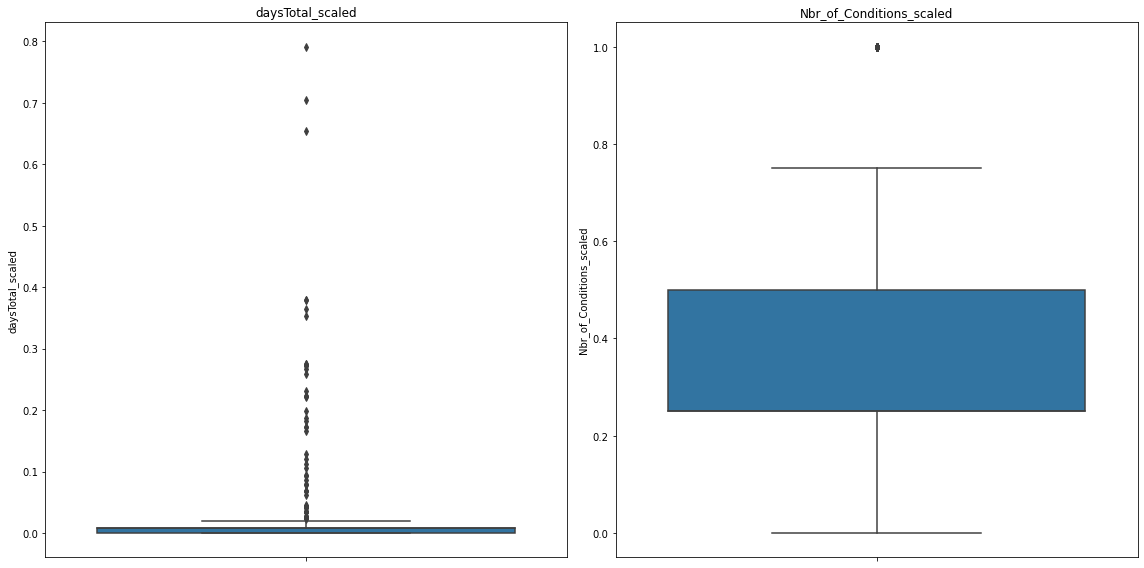

In [42]:
fig3, axes = plt.subplots(1, 2, figsize=(16,8))
for i in range(2):
    sns.boxplot(y=v_cont[i]
                , data = X_train, ax=axes[i])
    axes[i].set_title(v_cont[i])
plt.tight_layout()

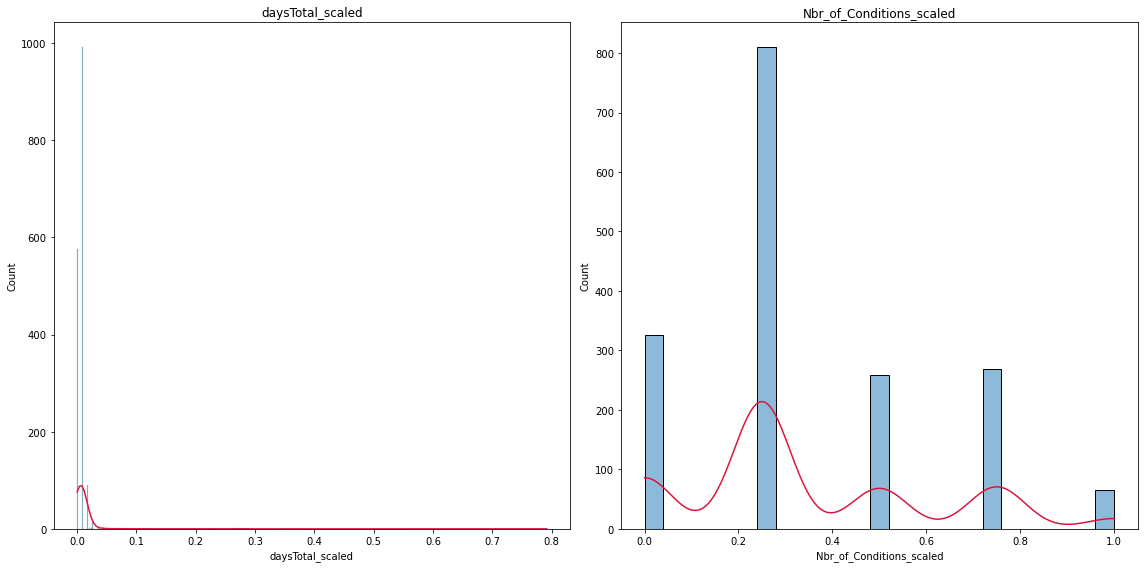

In [43]:
fig4, axes = plt.subplots(1, 2, figsize=(16,8))
for i in range(2):
    sns.histplot(x=v_cont[i]
                , data = X_train, ax=axes[i]
                , kde = True)
    axes[i].lines[0].set_color('crimson')
    axes[i].set_title(v_cont[i])
plt.tight_layout()

### Categorical variables

In [44]:
v_cat = ["GeneAllele"
         , "hiv"
         , "diabetes"
         , "cvd"
         , "anyca"]

In [45]:
for name_ in v_cat:
    s = X_train[[name_]]
    counts = s.value_counts()
    #percent = s.value_counts(normalize=True)
    percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    #print(name_)
    display(pd.DataFrame({'Counts': counts, 'Percentage': percent100}))
    print('\n')

,Counts,Percentage
GeneAllele,,
1,1364,78.9%
0,365,21.1%


,Counts,Percentage
hiv,,
1,1120,64.8%
0,609,35.2%


,Counts,Percentage
diabetes,,
0,1320,76.3%
1,409,23.7%


,Counts,Percentage
cvd,,
0,1302,75.3%
1,427,24.7%


,Counts,Percentage
anyca,,
0,1290,74.6%
1,439,25.4%


## Explore the relationship between outcome variable and numerical variables

In [46]:
df_cont = X_train.loc[:, v_cont]

In [47]:
df_cont['Nbr_FU_Visits'] = y_train.values

In [48]:
df_cont = movecol(df_cont
                 , cols_to_move=['Nbr_FU_Visits']
                 , ref_col = 'daysTotal_scaled'
                 , place= "Before")

In [49]:
df_cont.head()

,Nbr_FU_Visits,daysTotal_scaled,Nbr_of_Conditions_scaled
986,15,0.000000,0.00
468,17,0.008603,0.50
1904,7,0.000000,0.00
140,27,0.008603,0.25
42,9,0.008603,0.25


In [50]:
df_cont.shape

(1729, 3)

<Figure size 1152x1152 with 0 Axes>

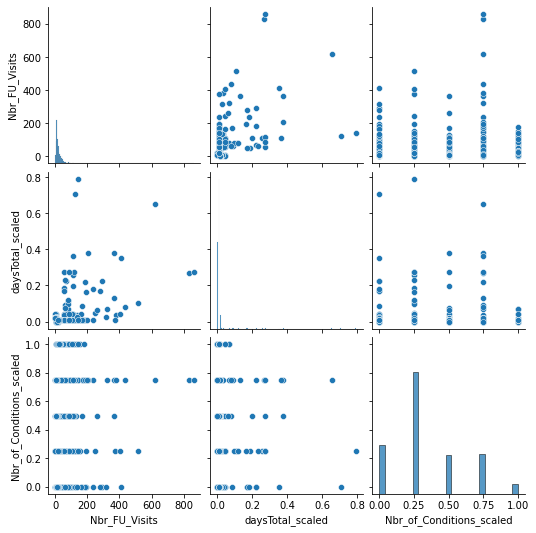

In [51]:
fig5 = plt.figure(figsize=(16, 16))
sns.pairplot(df_cont)
plt.show()

## Explore the relationship between outcome variable and categorical variables:


In [52]:
df_cat= X_train.loc[:, v_cat]

In [53]:
df_cat.shape

(1729, 5)

In [54]:
df_cat['Nbr_FU_Visits'] = y_train.values

In [55]:
df_cat = movecol(df_cat
                , cols_to_move=['Nbr_FU_Visits']
                , ref_col='GeneAllele'
                , place='Before')

<Figure size 1152x1152 with 0 Axes>

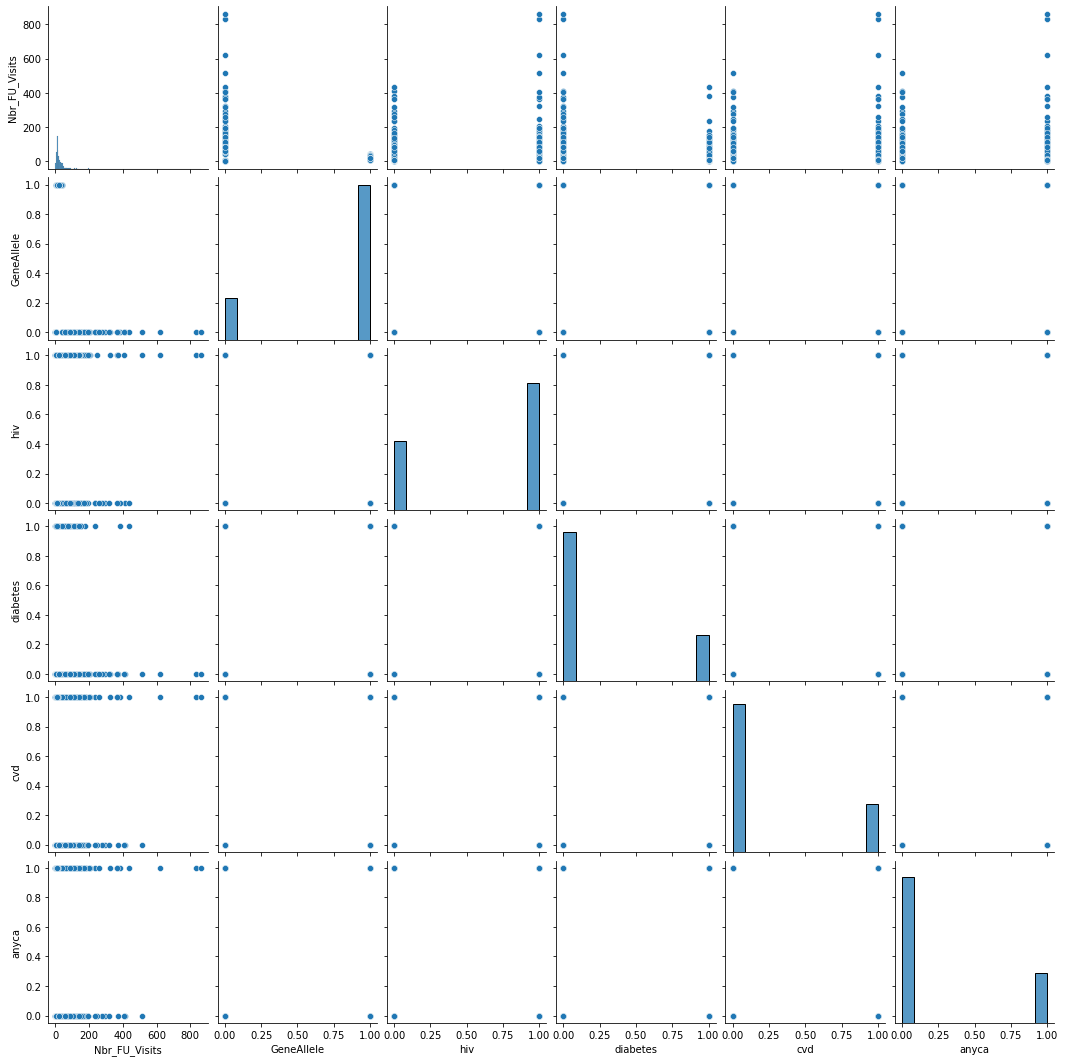

In [56]:
fig6 = plt.figure(figsize=(16, 16))
sns.pairplot(df_cat)
plt.show()

# Modeling

## RandomForest Model

### Hyperparameter tuning

In [57]:
rf = RandomForestRegressor(random_state=2022)

In [58]:
rf_parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

In [59]:
rf_cv = GridSearchCV(rf
                 , scoring ='r2'
                 , cv = 5
                 , param_grid = rf_parameters)

In [60]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2022),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [4, 6, 9, 10, 15]},
             scoring='r2')

In [61]:
# R square
print(rf_cv.best_score_)

0.5250055708680482


In [62]:
print(rf_cv.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 6}


### Build RandomForest Model with best hyperparameters

In [63]:
rf = RandomForestRegressor(max_depth = 10
                           , max_features = 'auto'
                           , min_samples_leaf = 8
                           , min_samples_split = 2
                           , n_estimators = 6
                           , random_state = 2022)

In [64]:
regressor_metrics(rf, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['0.629', '-0.010', '0.719', '0.604', '0.682', '0.565', '0.708', '0.296', '-0.227', '0.222', '0.525', '0.758', '0.635', '0.446', '0.548']
Mean of Cross validation results: R square = 0.473


R square on testing data set: 0.467



RMSE on training data set: 33.794

RMSE on testing data set: 30.206



In [65]:
r2 = []
r2.append(['0.629', '-0.010', '0.719', '0.604'
           , '0.682', '0.565', '0.708', '0.296'
           , '-0.227', '0.222', '0.525', '0.758'
           , '0.635', '0.446', '0.548'])

In [66]:
r2

[['0.629',
  '-0.010',
  '0.719',
  '0.604',
  '0.682',
  '0.565',
  '0.708',
  '0.296',
  '-0.227',
  '0.222',
  '0.525',
  '0.758',
  '0.635',
  '0.446',
  '0.548']]

## Xgboot

### Hyperparameter tuning
learning_rate, n_estimator, colsample_bytree, gamma

In [67]:
xgb = XGBRegressor(scale_pos_weight=0.1
                   , n_jobs=0
                  , random_state= 2022)

In [68]:
learning_rates = [0.01, 0.05, 0.1]
n_estimators = np.linspace(100, 200, 2, endpoint=True, dtype=int)
colsample_bytree = np.linspace(0.3, 0.8, 3, endpoint=True)
gama = [0, 1, 5]
lambda_ = [4, 6, 8]

In [69]:
#sorted(SCORERS.keys())

In [70]:
xgb_cv = GridSearchCV(xgb
                 , scoring = 'r2'
                 , cv = 5
                 , param_grid = {'learning_rate': learning_rates
                                , 'n_estimators': n_estimators
                                , 'colsample_bytree': colsample_bytree
                                , "gamma": gama
                                , "reg_lambda": lambda_})

In [71]:
xgb_cv.fit(X_train, y_train)

/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index i

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=2022, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=0.1,
                                 

In [72]:
# Negative MSE
print(xgb_cv.best_score_)

0.4902575641493093


In [73]:
print(xgb_cv.best_params_)

{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.05, 'n_estimators': 100, 'reg_lambda': 8}


### Build Xgboots model

In [74]:
xgb = XGBRegressor(colsample_bytree=0.8
                   , learning_rate = 0.05
                   , n_estimators = 100
                   , reg_lambda=8
                  , random_state = 2022
                  , gamma = 1)

In [75]:
regressor_metrics(xgb, X_train, X_test, y_train, y_test)

/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index i

Cross validation results: R square = ['0.634', '0.657', '0.626', '0.392', '0.570', '0.521', '0.737', '0.084', '-0.401', '0.222', '0.568', '0.644', '0.605', '0.641', '0.290']
Mean of Cross validation results: R square = 0.453


R square on testing data set: 0.502



RMSE on training data set: 27.492

RMSE on testing data set: 29.182



/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [76]:
r2.append(['0.634', '0.657', '0.626', '0.394'
           , '0.569', '0.520', '0.737', '0.083'
           , '-0.402', '0.224', '0.568', '0.644'
           , '0.605', '0.641', '0.291'])

In [77]:
r2

[['0.629',
  '-0.010',
  '0.719',
  '0.604',
  '0.682',
  '0.565',
  '0.708',
  '0.296',
  '-0.227',
  '0.222',
  '0.525',
  '0.758',
  '0.635',
  '0.446',
  '0.548'],
 ['0.634',
  '0.657',
  '0.626',
  '0.394',
  '0.569',
  '0.520',
  '0.737',
  '0.083',
  '-0.402',
  '0.224',
  '0.568',
  '0.644',
  '0.605',
  '0.641',
  '0.291']]

## Support vector machine (SVM)

### Hyperparameter tuning

In [78]:
svr = SVR()

In [79]:
svr_parameters = {'C': [1, 10, 100, 1000]
                  , 'gamma': [0.001, 0.0001]
                  , 'kernel': ['rbf']}

In [80]:
svr_cv = GridSearchCV(svr
                      , param_grid = svr_parameters
                      , scoring = 'r2'
                      , cv = 5)

In [81]:
svr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='r2')

In [82]:
print(svr_cv.best_score_)

0.18350314053015465


In [83]:
print(svr_cv.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


### Build SVM Model with best hyperparameters

In [84]:
svr = SVR(C = 1000
          , kernel = 'rbf'
          , gamma = 0.001)

In [85]:
regressor_metrics(svr, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['0.289', '0.323', '0.163', '0.134', '0.232', '0.098', '0.255', '0.152', '0.377', '0.145', '0.079', '0.238', '0.204', '0.256', '0.179']
Mean of Cross validation results: R square = 0.208


R square on testing data set: 0.223



RMSE on training data set: 46.995

RMSE on testing data set: 36.464



In [86]:
r2.append(['0.289', '0.323', '0.163', '0.134'
           , '0.232', '0.098', '0.255', '0.152'
           , '0.377', '0.145', '0.079', '0.238'
           , '0.204', '0.256', '0.179'])

In [87]:
r2

[['0.629',
  '-0.010',
  '0.719',
  '0.604',
  '0.682',
  '0.565',
  '0.708',
  '0.296',
  '-0.227',
  '0.222',
  '0.525',
  '0.758',
  '0.635',
  '0.446',
  '0.548'],
 ['0.634',
  '0.657',
  '0.626',
  '0.394',
  '0.569',
  '0.520',
  '0.737',
  '0.083',
  '-0.402',
  '0.224',
  '0.568',
  '0.644',
  '0.605',
  '0.641',
  '0.291'],
 ['0.289',
  '0.323',
  '0.163',
  '0.134',
  '0.232',
  '0.098',
  '0.255',
  '0.152',
  '0.377',
  '0.145',
  '0.079',
  '0.238',
  '0.204',
  '0.256',
  '0.179']]

## Decision tree

### Hyperparameter tuning

In [88]:
dt = DecisionTreeRegressor(random_state=2022)

In [89]:
dt_parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]}

In [90]:
dt_cv = GridSearchCV(dt
                 , scoring ='r2'
                 , cv = 5
                 , param_grid = dt_parameters)

In [91]:
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=2022),
             param_grid={'max_depth': [2, 3, 5, 10, 50],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 5, 8, 10],
                         'min_samples_split': [2, 3, 50, 100]},
             scoring='r2')

In [92]:
print(dt_cv.best_score_)

0.4695820366200227


In [93]:
print(dt_cv.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 50}


### Build Decision Tree Model with best hyperparameters

In [94]:
dt = DecisionTreeRegressor(max_depth = 10
                            , max_features = 'auto'
                            , min_samples_leaf = 8
                            , min_samples_split = 50
                            , random_state=2022)

In [95]:
regressor_metrics(dt, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['0.610', '-0.275', '0.599', '0.455', '0.639', '0.321', '0.477', '0.128', '-0.504', '0.220', '0.499', '0.647', '0.651', '0.042', '0.551']
Mean of Cross validation results: R square = 0.337


R square on testing data set: 0.422



RMSE on training data set: 34.659

RMSE on testing data set: 31.457



In [96]:
r2.append(['0.610', '-0.275', '0.599', '0.455'
           , '0.639', '0.321', '0.477', '0.128'
           , '-0.504', '0.220', '0.499', '0.647'
           , '0.651', '0.042', '0.551'])

In [97]:
r2

[['0.629',
  '-0.010',
  '0.719',
  '0.604',
  '0.682',
  '0.565',
  '0.708',
  '0.296',
  '-0.227',
  '0.222',
  '0.525',
  '0.758',
  '0.635',
  '0.446',
  '0.548'],
 ['0.634',
  '0.657',
  '0.626',
  '0.394',
  '0.569',
  '0.520',
  '0.737',
  '0.083',
  '-0.402',
  '0.224',
  '0.568',
  '0.644',
  '0.605',
  '0.641',
  '0.291'],
 ['0.289',
  '0.323',
  '0.163',
  '0.134',
  '0.232',
  '0.098',
  '0.255',
  '0.152',
  '0.377',
  '0.145',
  '0.079',
  '0.238',
  '0.204',
  '0.256',
  '0.179'],
 ['0.610',
  '-0.275',
  '0.599',
  '0.455',
  '0.639',
  '0.321',
  '0.477',
  '0.128',
  '-0.504',
  '0.220',
  '0.499',
  '0.647',
  '0.651',
  '0.042',
  '0.551']]

## KNN

### Hyperparameter tuning

In [98]:
knn = KNeighborsRegressor()

In [99]:
knn_parameters = {'n_neighbors': [3, 4, 5, 10]
                  , 'weights': ['uniform', 'distance']
                  , 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
                  , 'leaf_size' : [10, 20, 30, 50]}

In [100]:
knn_cv = GridSearchCV(knn
                 , scoring ='r2'
                 , cv = 5
                 , param_grid = knn_parameters)

In [101]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50],
                         'n_neighbors': [3, 4, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [102]:
print(knn_cv.best_score_)

0.4977270250843876


In [103]:
print(knn_cv.best_params_)

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}


### Build KNN model with best hyperparameters

In [104]:
knn = KNeighborsRegressor(algorithm = 'brute'
                          , leaf_size = 10
                          , n_neighbors = 10
                          , weights = 'distance')

In [105]:
regressor_metrics(knn, X_train, X_test, y_train, y_test)

Cross validation results: R square = ['0.654', '0.644', '0.413', '0.565', '0.390', '0.907', '0.312', '0.363', '-0.925', '0.422', '0.840', '0.452', '0.610', '0.323', '0.313']
Mean of Cross validation results: R square = 0.419


R square on testing data set: 0.419



RMSE on training data set: 18.895

RMSE on testing data set: 31.515



In [106]:
r2.append(['0.654', '0.644', '0.413', '0.565'
           , '0.390', '0.907', '0.312', '0.363'
           , '-0.925', '0.422', '0.840', '0.452'
           , '0.610', '0.323', '0.313'])

In [107]:
r2

[['0.629',
  '-0.010',
  '0.719',
  '0.604',
  '0.682',
  '0.565',
  '0.708',
  '0.296',
  '-0.227',
  '0.222',
  '0.525',
  '0.758',
  '0.635',
  '0.446',
  '0.548'],
 ['0.634',
  '0.657',
  '0.626',
  '0.394',
  '0.569',
  '0.520',
  '0.737',
  '0.083',
  '-0.402',
  '0.224',
  '0.568',
  '0.644',
  '0.605',
  '0.641',
  '0.291'],
 ['0.289',
  '0.323',
  '0.163',
  '0.134',
  '0.232',
  '0.098',
  '0.255',
  '0.152',
  '0.377',
  '0.145',
  '0.079',
  '0.238',
  '0.204',
  '0.256',
  '0.179'],
 ['0.610',
  '-0.275',
  '0.599',
  '0.455',
  '0.639',
  '0.321',
  '0.477',
  '0.128',
  '-0.504',
  '0.220',
  '0.499',
  '0.647',
  '0.651',
  '0.042',
  '0.551'],
 ['0.654',
  '0.644',
  '0.413',
  '0.565',
  '0.390',
  '0.907',
  '0.312',
  '0.363',
  '-0.925',
  '0.422',
  '0.840',
  '0.452',
  '0.610',
  '0.323',
  '0.313']]

## Models performance comparison

In [108]:
regressors_ = ['RF', 'XGB', 'SVM', 'DT', 'KNN']

In [109]:
df_r2 = pd.DataFrame(r2, index=regressors_).T

In [110]:
df_r2 = df_r2.astype(float)

In [111]:
df_r2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RF      15 non-null     float64
 1   XGB     15 non-null     float64
 2   SVM     15 non-null     float64
 3   DT      15 non-null     float64
 4   KNN     15 non-null     float64
dtypes: float64(5)
memory usage: 728.0 bytes


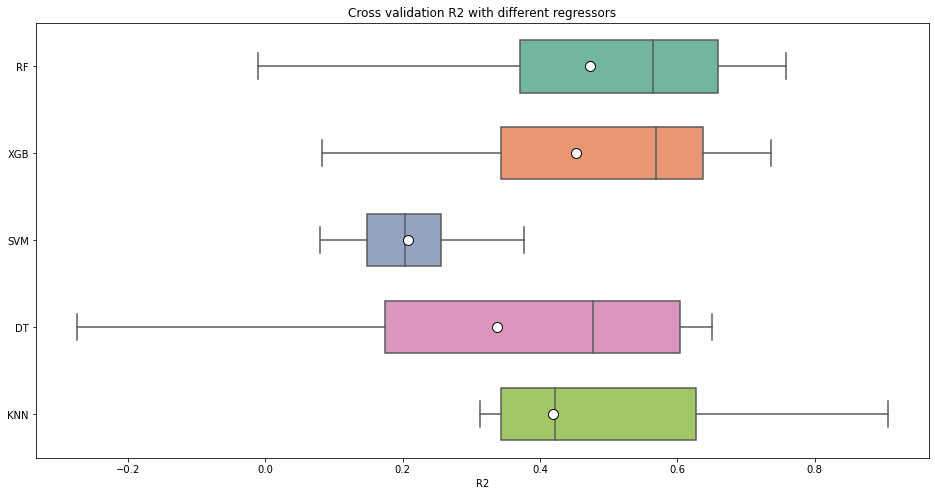

In [112]:
fig6, ax = plt.subplots(1, 1, figsize=(16,8))
ax = sns.boxplot(data=df_r2, orient="h", palette="Set2", width=.6, showfliers=False
                , showmeans=True
                , meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
ax.set_yticklabels(regressors_)
ax.set_title('Cross validation R2 with different regressors')
ax.set_xlabel('R2')
#ax.set_xlim(0.9, 1)
plt.show()

# Final model

## Fit model

In [113]:
xgb = XGBRegressor(colsample_bytree=0.8
                   , learning_rate = 0.05
                   , n_estimators = 100
                   , reg_lambda=8
                  , random_state = 2022
                  , gamma = 1)

In [114]:
regressor_metrics(xgb, X_train, X_test, y_train, y_test)

/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index i

Cross validation results: R square = ['0.634', '0.657', '0.626', '0.392', '0.570', '0.521', '0.737', '0.084', '-0.401', '0.222', '0.568', '0.644', '0.605', '0.641', '0.290']
Mean of Cross validation results: R square = 0.453


R square on testing data set: 0.502



RMSE on training data set: 27.492

RMSE on testing data set: 29.182



/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/opt/anaconda3/envs/ML_basic/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### Feature importance

In [115]:
feature_importance = pd.DataFrame(xgb.feature_importances_
                                  , columns=['Feature importance']
                                  , index = X_train.columns)

In [116]:
feature_importance.sort_values('Feature importance', inplace=True, ascending=False)

In [117]:
feature_importance

,Feature importance
GeneAllele,0.696225
daysTotal_scaled,0.186693
cvd,0.042674
anyca,0.029145
Nbr_of_Conditions_scaled,0.023836
hiv,0.017626
diabetes,0.003801


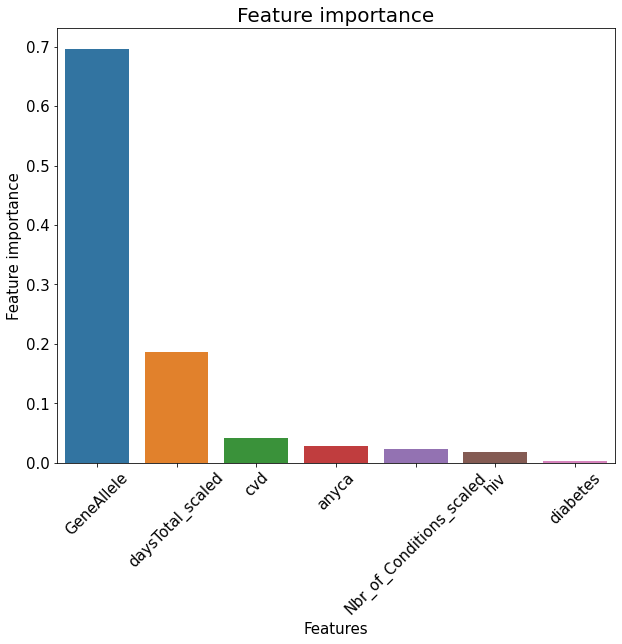

In [118]:
fig10, ax = plt.subplots(figsize=(10,8))
sns.barplot(x= feature_importance.index, y='Feature importance', data = feature_importance)
plt.xticks(rotation=45,fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Feature importance', fontsize=15)
plt.title('Feature importance', fontsize=20)
plt.show()